In [1]:
from PyBN.fuzzy_network import FuzzyBooleanNetwork
from PyBN.graphs import create_uniform_graph
from PyBN.bn_plots import box_plot
import numpy as np

In [2]:
n = 16
k = 1
b = 4

In [3]:
graph = create_uniform_graph(n, k)
fuzzynet = FuzzyBooleanNetwork(n, 4, graph)

In [4]:
data_list = []
for _ in range(4):
    data = np.zeros((16,33))
    fuzzynet.set_initial_state()
    data[:,0] = fuzzynet.state
    for i in range(32):
        fuzzynet.step()
        data[:,i+1] = fuzzynet.state
    data_list.append(data)

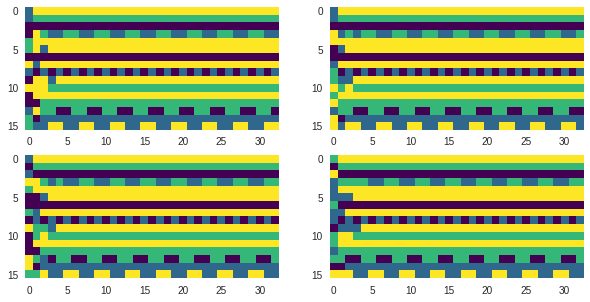

In [5]:
box_plot(data_list, fig_size=(10,5))